In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from plots import line_CI_plot, line_CI_plot_2

In [3]:
def prop_na(dataframe):
    # each column with nans will have the minimum value of that col
    # used to replace the nan
    for col in dataframe.columns:
        fval = dataframe[col].min()
        filled_col = dataframe[col].fillna(fval)
        dataframe[col] = filled_col
    return dataframe

In [4]:
def load_data_CI(files):
    dfs = [pd.read_csv(file, index_col=1)[["Value"]] for file in files]
    data = pd.concat(dfs, axis=1)
    data.columns = [str(i) for i in range(data.shape[1])]
    data = prop_na(data)
    data = data.iloc[:20000//50, :]
    mean = data.mean(axis=1)
    stderr = data.std(axis=1, ddof=0)/(~data.isna()).sum(axis=1).apply(np.sqrt)
    low_CI = (mean - 1.645*stderr)
    high_CI = (mean + 1.645*stderr)
    return (mean, low_CI, high_CI)

In [5]:
resultsdir = "/home/dillon/data/results/"
base_fs = [resultsdir+"baseline/run_baseline_LN_1l_256u_0.3d_0.3rd_sub%d-tag-eval_loss.csv"%(i) for i in range(1, 6)]
outSEQ_fs = [resultsdir+"outSEQ/run_pre_outSEQ_1l_256u_0.3d_0.3rd_sub%d-tag-eval_loss.csv"%(i) for i in range(1, 6)]
elmoSEQ_fs = [resultsdir+"elmoSEQ/run_pre_elmoSEQ_1l_256u_0.3d_0.3rd_sub%d-tag-eval_loss.csv"%(i) for i in range(1, 6)]
ELMOseq_fs = [resultsdir+"ELMOseq/run_pre_ELMOseq_1l_256u_0.3d_0.3rd_sub%d-tag-eval_loss.csv"%(i) for i in range(1, 6)]


In [6]:
data = [load_data_CI(fs) for fs in [base_fs, outSEQ_fs, elmoSEQ_fs, ELMOseq_fs]]
means, low_CIs, high_CIs = zip(*data)

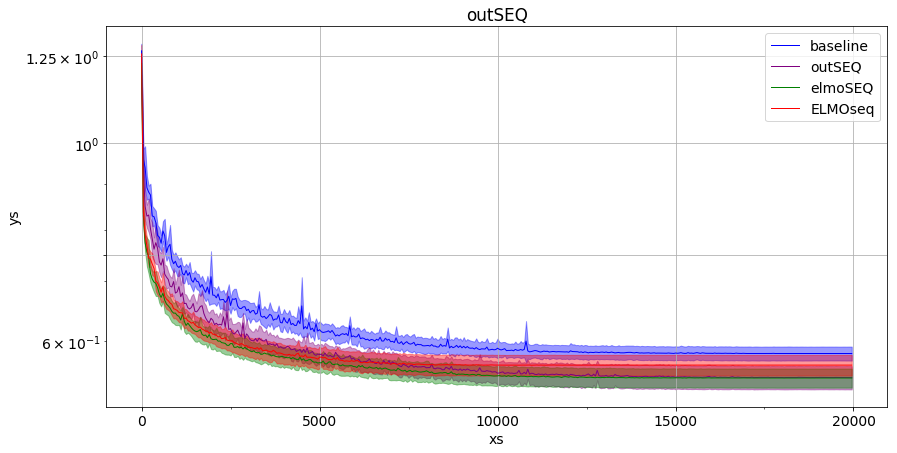

In [7]:
line_CI_plot([m.index.values for m in means], 
             [m.values for m in means], 
             [m.index.values for m in means], 
             [ci.values for ci in low_CIs], 
             [ci.values for ci in high_CIs], 
             ["baseline",
              "outSEQ",
              "elmoSEQ",
              "ELMOseq"], 
             ["blue", "purple", "green", "red"], 
             "xs", "ys", "outSEQ")

In [8]:
import plotly.offline as py
import plotly.graph_objs as go

fig = line_CI_plot_2(means, low_CIs, high_CIs, 
                     ["baseline valid loss",
                      "outSEQ valid loss",
                      "elmoSEQ valid loss",
                      "ELMOseq valid loss"],
                     ["blue", "purple", "green", "red"],
                     )

py.plot(fig)

'file:///home/dillon/github/pssp_lstm/lm_pretrain/analysis/temp-plot.html'